# Analyse de la fréquentation des espaces à la médiathèque

Depuis octobre 2023, la médiathèque de Roubaix a décidé d'effectuer une analyse plus régulière de la fréquentation des espaces. L'indicateur des `entrées` ne permettant pas d'avoir une idée suffisamment représentative de l'activité et de l'occupation des différents espaces.

Il a été décidé suite à une réunion avec François Pichenot, responsable du SSN, de récolter de manière régulière des données en utilisant plusieurs indicateurs : 
* `espace` : ce sont les espaces ouverts au publics à la médiathèque
* `nb_personnes_assises` : le nombre de personnes assises
* `nb_personnes_debout` : le nombre de personnes debout en mouvement
* `nb_personnes_totales` : c'est la somme des personnes assises et des personnes debout un espace
* `horaire` : c'est l'horaire auquel est effectué le comptage (de 9h30 à 18h30 du mardi au samedi et de 14h30 à 17h30 le dimanche)
* `date`: la date à laquelle est effectuée le comptage 
* `jour` : le jour de la semaine auquel est effectué le comptage

**Avec quelle régularité est effectué le comptage ?**

Le comptage de la fréquentation s'effectue entre chaque période de vacances scolaire

**Combien de temps dure le comptage ?**
Le comptage se déroule sur une semaine complète, du mardi au dimanche

**Comment est effectué le comptage ?**

La semaine précédent le comptage, le responsable du projet invite par mail les collègues à remplir un planning de comptage (sur base du volontariat). Une fiche de comptage est prévue (support papier) pour inscrire le nombre de personnes (assises et debout) dans chaque espace ouvert au public (rez-de-chaussée, Lac, Jeunesse, Salle d'étude, Phare et salle multimédia). 

Le comptage s'effectue toutes les heures entre 9h30 et 18h30. 

**Où se trouvent les plannings, fiches de comptage etc ?**
Les fichiers sont disponibles dans Zebulon (partage_media) au chemin suivant : 

→ *\\srvdata01p\mediatheque\partage_media\ECRIN\Lucas\Analyser l'activité de la médiathèque\Étudier la fréquentation des espaces\modeles*

**Où sont stockées les données de comptage ?**

Au 28/03/2024, les données sont stockées dans des fichiers excels (*\\srvdata01p\mediatheque\partage_media\ECRIN\Lucas\Analyser l'activité de la médiathèque\Étudier la fréquentation des espaces*). 

Ces données sont ensuite exporter vers le serveur de la mairie au chemin suivant : *ome/kibini/kibini2/data_lucas/frequentation_par_espace/*

> Piste : créer une table dans statdb ? (si effectué, normaliser les noms de colonne)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
#from kiblib.utils import lucas_sns_params
import matplotlib.pyplot as plt

# Définition variables

In [2]:
# Définition d'une liste contenant les jours d'ouverture dans l'ordre
jour_ouverture = ['mardi','mercredi','jeudi','vendredi','samedi','dimanche']

year = '2024'
week = '42'

In [3]:
# Nb places assises en période "normale"

nb_places_cafe = 42
nb_places_rdc = 61
nb_places_lac = 68
nb_places_jeunesse = 48
nb_places_etude = 33
nb_places_phare = 32
nb_places_xia = 18

# Définition Fonctions

In [4]:
def UpdateColumns(df):
    # Ajout d'une colonne total
    df['nb_total_personnes'] = df['nb_personnes_assises'] + df['nb_personnes_debout']

    # Modif de l'heure
    df.loc[df['horaire']=='9h30',['horaire']] = '09h30'
    
    # Ajout du Nb de places assises en période d'affluence normale (comptage des places effectué le 22/06/2024)
    df.loc[df['espace']=='Café',['nb_places_assises']] = nb_places_cafe
    df.loc[df['espace']=='Rez-de-chaussée',['nb_places_assises']] = nb_places_rdc
    df.loc[df['espace']=='Lac',['nb_places_assises']] = nb_places_lac
    df.loc[df['espace']=='Jeunesse',['nb_places_assises']] = nb_places_jeunesse
    df.loc[df['espace']=='Salle d\'étude',['nb_places_assises']] = nb_places_etude
    df.loc[df['espace']=='Phare',['nb_places_assises']] = nb_places_phare
    df.loc[df['espace']=='Salle Multimédia',['nb_places_assises']] = nb_places_xia


    # Ajout d'un taux d'occupation des places assises
    df['tx_occupation_places'] = round(df['nb_personnes_assises'] / df['nb_places_assises'],2)
    
    return(df)

In [5]:
def ActiviteFreqentation(df,espace,value):
    jour_ouverture = ['mardi','mercredi','jeudi','vendredi','samedi','dimanche']
    resultat = df[df['espace']==espace].pivot_table(index='horaire',
                                                    columns='date',
                                                    values=value)
    for jour in jour_ouverture:
        if jour not in resultat.columns:
            resultat[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
    
    resultat = resultat[jour_ouverture] 
    return(resultat)

In [6]:
def ActiviteFreqentationTotal(df,value):
    jour_ouverture = ['mardi','mercredi','jeudi','vendredi','samedi','dimanche']
    resultat = df.pivot_table(index='horaire',
                              columns='date',
                              values=value,
                              aggfunc=sum)
    
    for jour in jour_ouverture:
        if jour not in resultat.columns:
            resultat[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
    
    resultat = resultat[jour_ouverture] 
    return(resultat)

# Résultats

In [7]:
# Import des données
df_frequentation = pd.read_excel(f"/home/kibini/frequentation_par_espace_{year}_semaine_{week}.xlsx")

# Modification du dataframe
df_frequentation = UpdateColumns(df=df_frequentation)

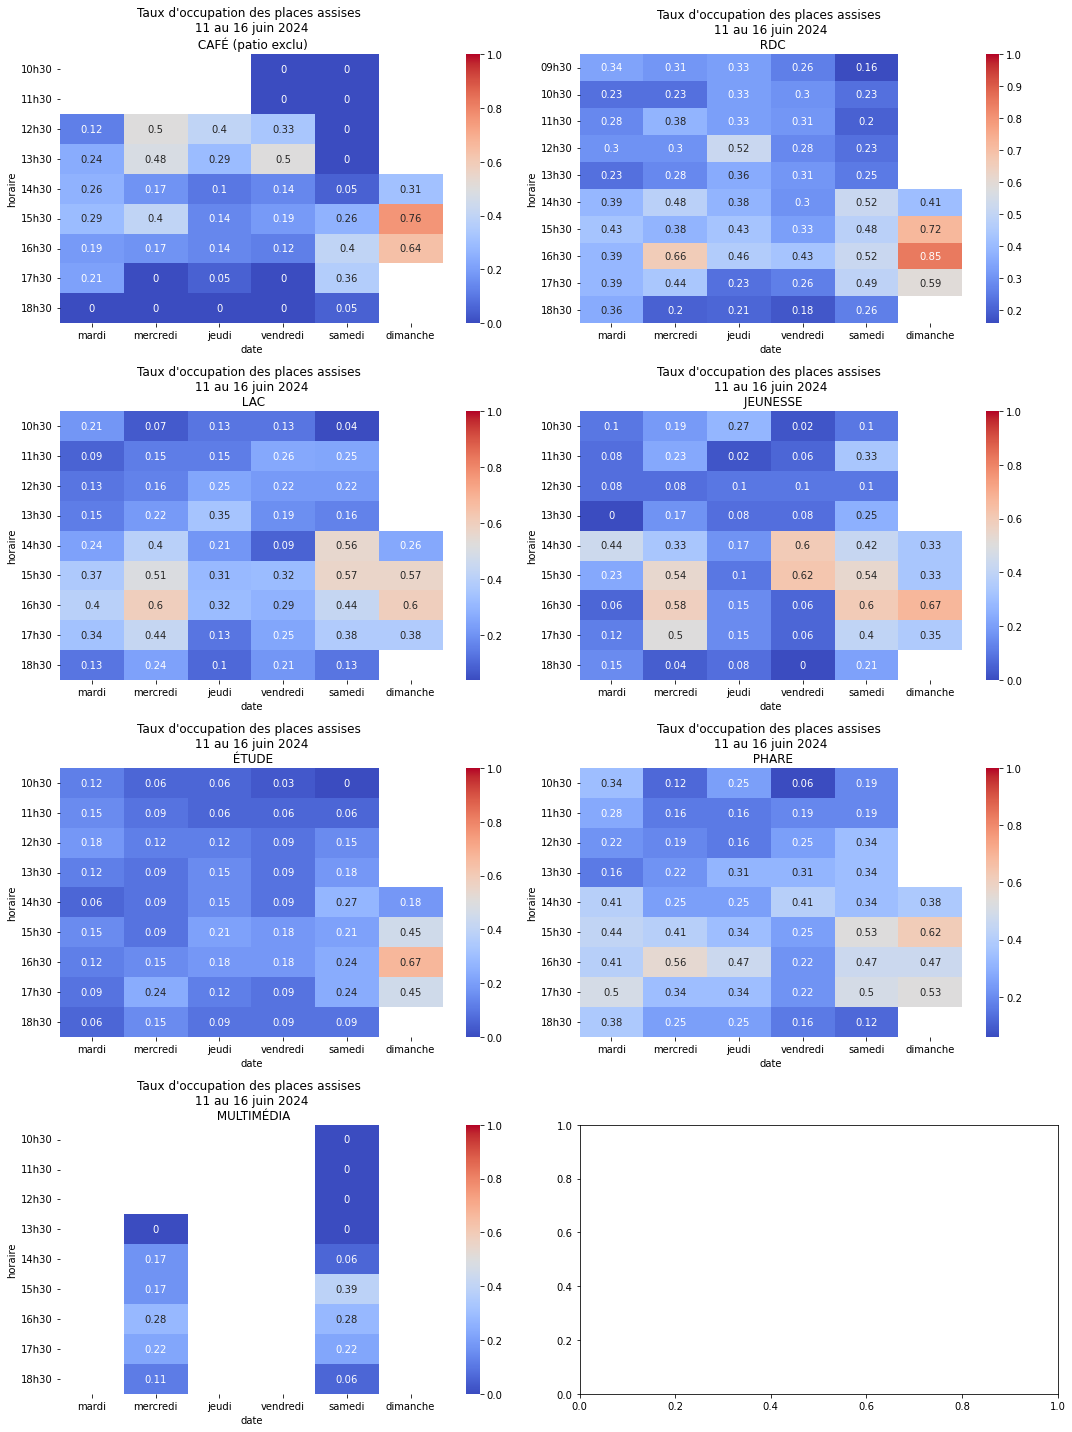

In [11]:
f, ax = plt.subplots(nrows=4,ncols=2,figsize=(15,20))

# Café
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Café',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',
            fmt='g',ax=ax[0,0])

# Rez-de-chaussée
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Rez-de-chaussée',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',fmt='g',ax=ax[0,1])


# Lac
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Lac',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',fmt='g',ax=ax[1,0])


# Jeunesse
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Jeunesse',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',fmt='g',ax=ax[1,1])


# Salle d'étude
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Salle d\'étude',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',fmt='g',ax=ax[2,0])


# Phare
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Phare',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',fmt='g',ax=ax[2,1])

# Multimédia
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Salle Multimédia',value='tx_occupation_places'),
            annot=True,vmax=1,
            cmap='coolwarm',fmt='g',ax=ax[3,0])


#TITRAGE
ax[0,0].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n CAFÉ (patio exclu)")
ax[0,1].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n RDC")
ax[1,0].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n LAC")
ax[1,1].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n JEUNESSE")
ax[2,0].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n ÉTUDE")
ax[2,1].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n PHARE")
ax[3,0].set_title("Taux d\'occupation des places assises \n 11 au 16 juin 2024 \n MULTIMÉDIA")

f.tight_layout()


plt.savefig(f"../data/frequentation/occupation_espaces/frequentation_par_espace_{year}_semaine{week}_taux_occupation.pdf")

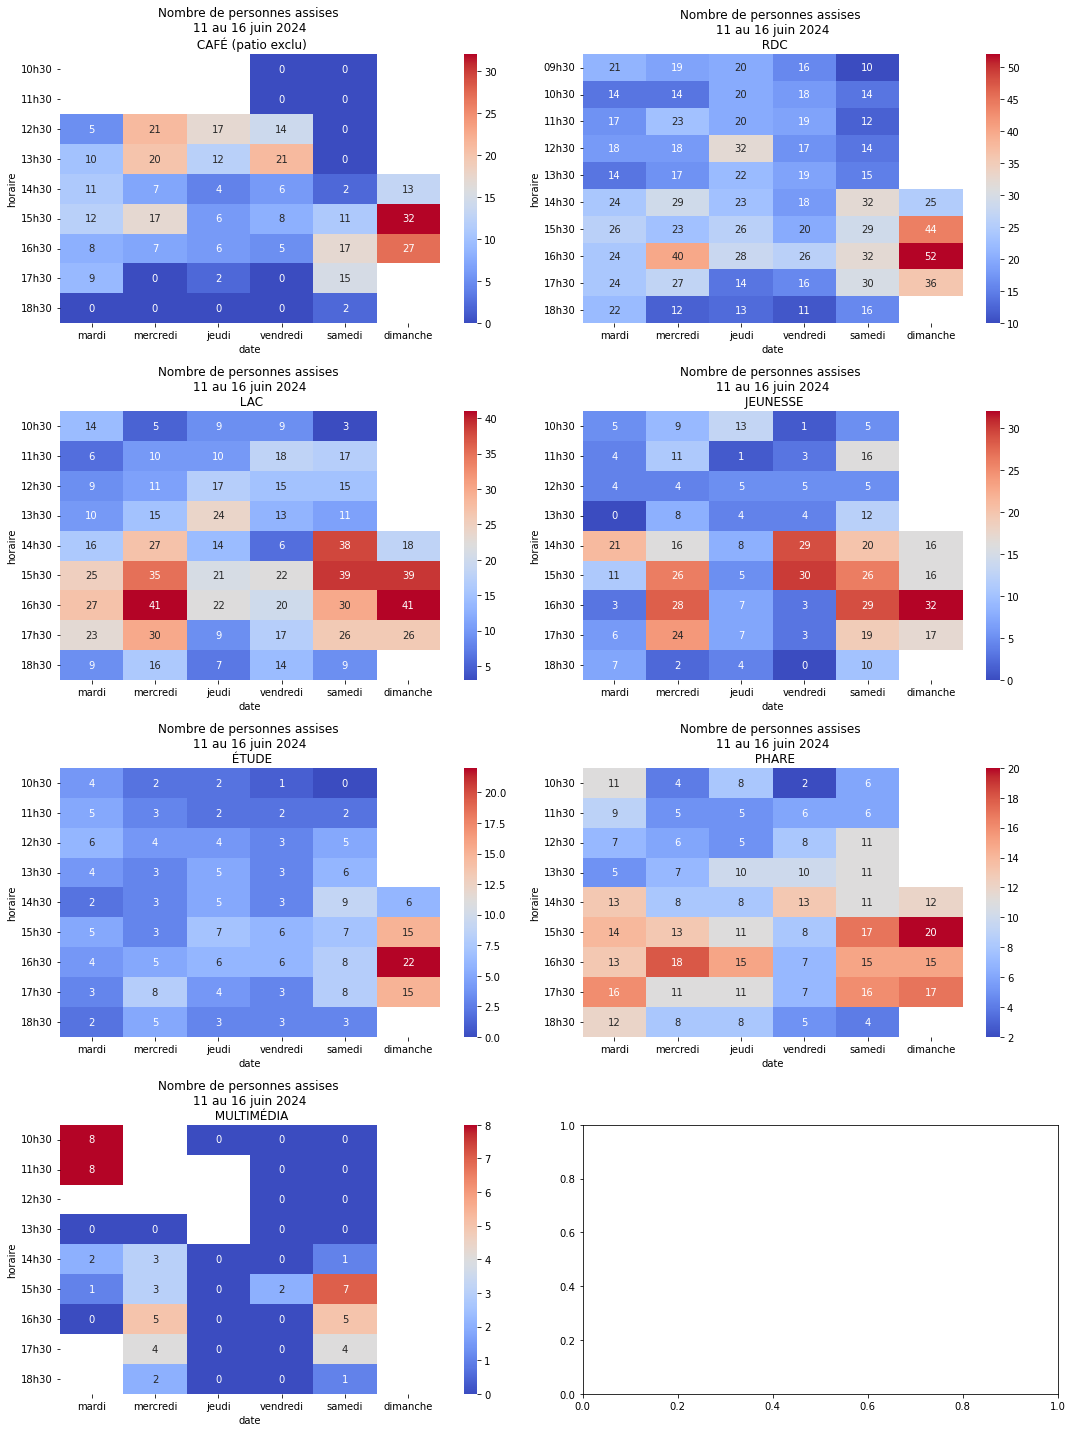

In [12]:
f, ax = plt.subplots(nrows=4,ncols=2,figsize=(15,20))

# Café
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Café',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',
            fmt='g',ax=ax[0,0])

# Rez-de-chaussée
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Rez-de-chaussée',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[0,1])


# Lac
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Lac',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[1,0])


# Jeunesse
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Jeunesse',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[1,1])


# Salle d'étude
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Salle d\'étude',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[2,0])


# Phare
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Phare',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[2,1])

# Multimédia
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Salle Multimédia',value='nb_personnes_assises'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[3,0])


#TITRAGE
ax[0,0].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n CAFÉ (patio exclu)")
ax[0,1].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n RDC")
ax[1,0].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n LAC")
ax[1,1].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n JEUNESSE")
ax[2,0].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n ÉTUDE")
ax[2,1].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n PHARE")
ax[3,0].set_title("Nombre de personnes assises \n 11 au 16 juin 2024 \n MULTIMÉDIA")

f.tight_layout()


plt.savefig(f"../data/frequentation/occupation_espaces/frequentation_par_espace_{year}_semaine{week}__nb_personnes_assises.pdf")

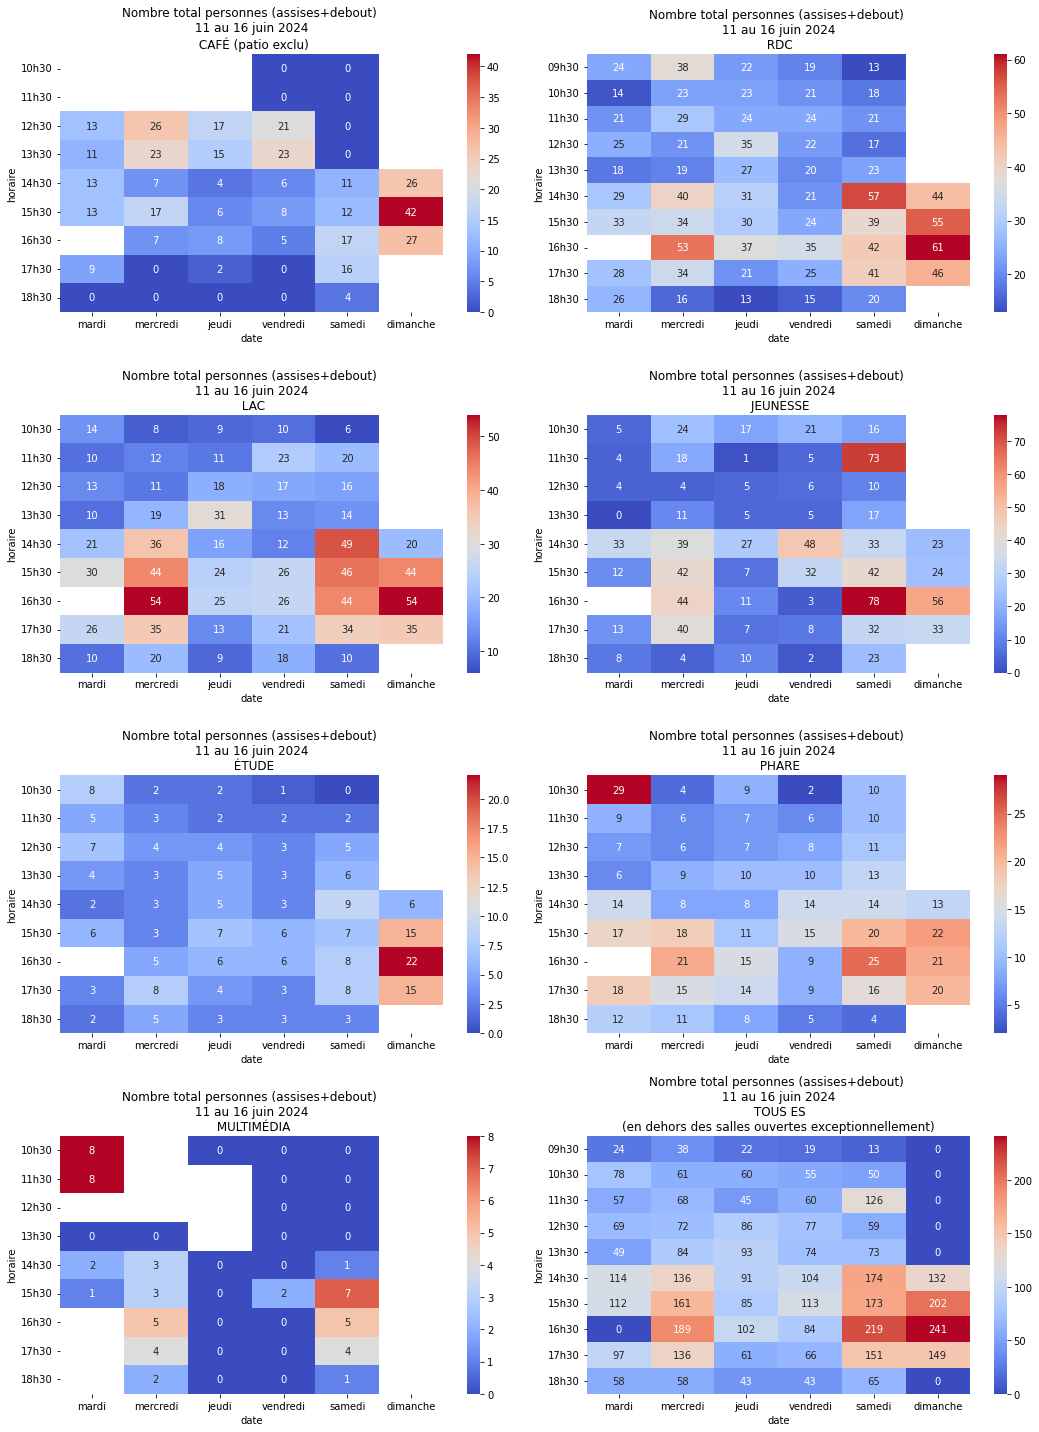

In [13]:
f, ax = plt.subplots(nrows=4,ncols=2,figsize=(15,20))

# Café
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Café',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',
            fmt='g',ax=ax[0,0])
            
# Rez-de-chaussée
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Rez-de-chaussée',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[0,1])


# Lac
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Lac',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[1,0])


# Jeunesse
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Jeunesse',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[1,1])


# Salle d'étude
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Salle d\'étude',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[2,0])


# Phare
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Phare',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[2,1])

# Multimédia
sns.heatmap(ActiviteFreqentation(df=df_frequentation,espace='Salle Multimédia',value='nb_total_personnes'),
            annot=True,
            cmap='coolwarm',fmt='g',ax=ax[3,0])

#Total
sns.heatmap(ActiviteFreqentationTotal(df=df_frequentation,value='nb_total_personnes'),annot=True,cmap='coolwarm',fmt='g')


#TITRAGE
ax[0,0].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n CAFÉ (patio exclu)")
ax[0,1].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n RDC")
ax[1,0].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n LAC")
ax[1,1].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n JEUNESSE")
ax[2,0].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n ÉTUDE")
ax[2,1].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n PHARE")
ax[3,0].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n MULTIMÉDIA")
ax[3,1].set_title("Nombre total personnes (assises+debout) \n 11 au 16 juin 2024 \n TOUS ES\n(en dehors des salles ouvertes exceptionnellement)")


f.tight_layout()

plt.savefig(f"../data/frequentation/occupation_espaces/frequentation_par_espace_{year}_semaine{week}_nb_total_personnes.pdf")